<a href="https://colab.research.google.com/github/gulfemkavak/proje/blob/main/MelbournePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import zscore


In [ ]:
data = pd.read_csv("Melbourne_housing_FULL.csv")

In [ ]:
# İlk 5 satırı görüntüle
print(data.head())

print("Shape: ", data.shape)

# Veri seti bilgileri
print(data.info())

In [ ]:
print(data.describe())
# Kategorik değişkenleri işaretle
categorical_columns = data.select_dtypes(include=['object']).columns

# Aynı değerlere sahip olan kategorik değişkenleri mod ile doldur
for column in categorical_columns:
    data[column] = data[column].fillna(data[column].mode().iloc[0])

In [ ]:

# Outlier'ları Z-Skoru kullanarak temizleme
z_scores = zscore(data[['Landsize', 'BuildingArea']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]


In [ ]:
# Eksik değerleri doldurun

data['Bathroom'] = data['Bathroom'].fillna(0)
data['Car'] = data['Car'].fillna(0)

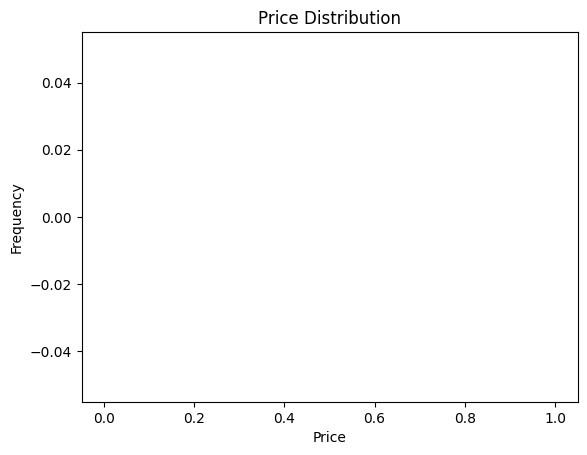

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1310: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.hue_vals = pd.Series(["_nolegend_"] * len(data),


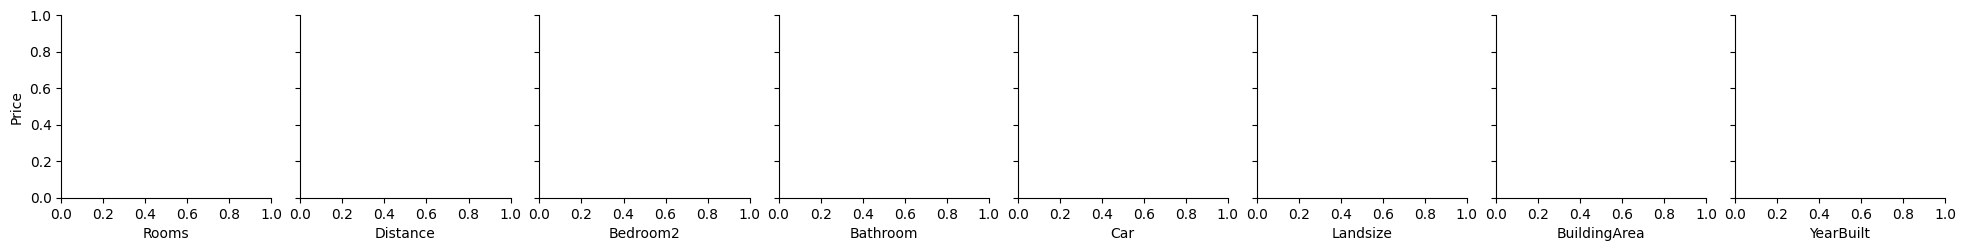

<ipython-input-25-d4ba5d98712c>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


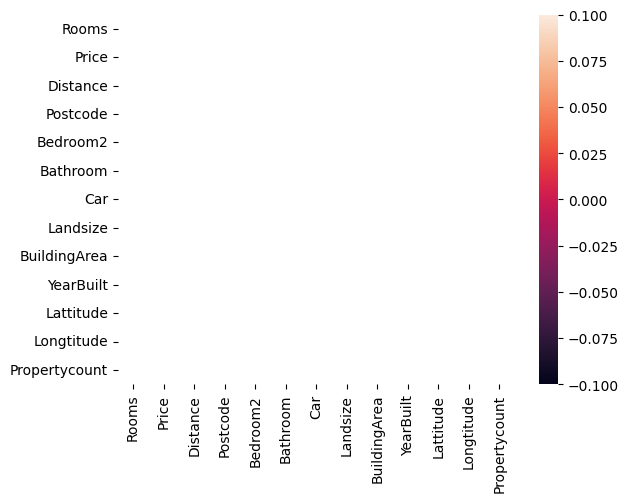

In [ ]:
# Histogram ile fiyat dağılımını görselleştirin
plt.hist(data['Price'], bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()
# Pair Plot ile sayısal değişkenlerin Price ile ilişkisini görüntüleyin
sns.pairplot(data, x_vars=['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt'],
             y_vars=['Price'])
plt.show()

# Isı haritası ile korelasyon matrisi
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
#model seçimi ve eğitimi
# X ve y değişkenlerini tanımlayın
X = data[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]
y = data['Price']

# Veriyi eğitim ve test setlerine bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelleri tanımlayın
models = {
    'Lasso': {'model': Lasso()},
    'LinearRegression': {'model': LinearRegression()},
    'Ridge': {'model': Ridge()},
    'ElasticNet': {'model': ElasticNet()},
    'KNeighborsRegressor': {'model': KNeighborsRegressor()},
    'RandomForestRegressor': {'model': RandomForestRegressor()},
    'GradientBoostingRegressor': {'model': GradientBoostingRegressor()},
    'AdaBoostRegressor': {'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)}
}

# Modelleri eğitim ve değerlendirme
results = {}
for name, model in models.items():
    model['model'].fit(X_train, y_train)
    y_pred = model['model'].predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

ValueError: ignored

In [ ]:
for name, result in results.items():
    print(name)
    print("MAE:", result['MAE'])
    print("MSE:", result['MSE'])
    print("RMSE:", result['RMSE'])
    print("R2:", result['R2'])
    print()

# En iyi performans gösteren modeli seçin
best_model = min(results, key=lambda x: results[x]['RMSE'])
print("En iyi performans gösteren model:", best_model)